<a href="https://colab.research.google.com/github/DIFACQUIM/HANNA/blob/main/Data_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -q rdkit-pypi
!pip install -q torch-geometric

In [18]:
import rdkit
print(f"rdkit_version: {rdkit.__version__}")
import torch_geometric
print(f"pythorch_version: {torch_geometric.__version__}")

rdkit_version: 2022.09.5
pythorch_version: 2.4.0


In [19]:
! git clone https://github.com/DIFACQUIM/HANNA.git

fatal: destination path 'HANNA' already exists and is not an empty directory.


In [20]:
import HANNA

from HANNA.Graph_from_smiles import from_smiles
from HANNA.Graph_to_smiles import to_smiles

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import numpy as np
from sklearn import preprocessing

In [21]:
import pandas as pd
# Read data set
url = "https://raw.githubusercontent.com/DIFACQUIM/HANNA/main/DATASETS/UNPD_subset_C_4998_curada_NPL_score.csv"
DATA = pd.read_csv(url)
print(f"Data_shape: {DATA.shape}")
DATA.head(2)

Data_shape: (4998, 4)


,ID,SMILES_chiral,SMILES_no_chiral,NPL_score
0,UNPD_subset_C_1,CN[C@H]1CC[C@]23C[C@]24CC[C@]2(C)[C@@H]([C@H](...,CNC1CCC23CC24CCC2(C)C(C(C)N(C)C)CCC2(C)C4C=CC3...,2.700
1,UNPD_subset_C_2,NC(=O)/C=C\I,NC(=O)C=CI,0.441


## Normalize NPL-score values

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DATA[["NPL_normalized"]] = scaler.fit_transform(DATA[["NPL_score"]])
DATA.head(2)

,ID,SMILES_chiral,SMILES_no_chiral,NPL_score,NPL_normalized
0,UNPD_subset_C_1,CN[C@H]1CC[C@]23C[C@]24CC[C@]2(C)[C@@H]([C@H](...,CNC1CCC23CC24CCC2(C)C(C(C)N(C)C)CCC2(C)C4C=CC3...,2.700,0.794118
1,UNPD_subset_C_2,NC(=O)/C=C\I,NC(=O)C=CI,0.441,0.442577


In [23]:
DATA.to_csv("UNPD_subset_C_4998_curada_NPL_normalized.csv", sep=",", index=False)

## Built molecular graphs

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
X_smiles = list(DATA['SMILES_chiral']) #get smiles strings from file
Y = np.asarray(DATA['NPL_score']) #get NPL values from file

# Shown the first value
print(f"X_smiles: {X_smiles[0]}")
print(f"NPL_normalized: {Y[0]}")

X_smiles: CN[C@H]1CC[C@]23C[C@]24CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@]2(C)[C@@H]4C=C[C@H]3C1(C)C
NPL_normalized: 2.7


In [26]:
import numpy as np
graphs_list = list()
for y, x in zip(Y, X_smiles):
    graphs_list.append(from_smiles(y,x))

tensor([2.7000])
tensor([0.4410])
tensor([0.9480])
tensor([0.3520])
tensor([1.7790])
tensor([0.1720])
tensor([0.3240])
tensor([0.2580])
tensor([0.6050])
tensor([3.7360])
tensor([0.5270])
tensor([1.1060])
tensor([0.7300])
tensor([1.1820])
tensor([0.8890])
tensor([2.4420])
tensor([2.5800])
tensor([1.4680])
tensor([1.9050])
tensor([2.3080])
tensor([2.8920])
tensor([1.8060])
tensor([1.2970])
tensor([1.0960])
tensor([2.3140])
tensor([0.9760])
tensor([0.8750])
tensor([0.4700])
tensor([-0.1170])
tensor([-0.2690])
tensor([1.8670])
tensor([0.8540])
tensor([2.0540])
tensor([2.8670])
tensor([0.])
tensor([0.9700])
tensor([1.0650])
tensor([0.9760])
tensor([1.3260])
tensor([-0.2750])
tensor([2.6840])
tensor([0.3620])
tensor([0.2820])
tensor([0.3060])
tensor([2.1060])
tensor([0.4880])
tensor([1.4760])
tensor([-1.0440])
tensor([-1.9680])
tensor([1.9230])
tensor([2.6250])
tensor([0.5830])
tensor([0.9230])
tensor([0.7070])
tensor([2.8160])
tensor([1.4430])
tensor([-0.2520])
tensor([0.5020])
tensor([2.25

In [27]:
# Save
import torch
torch.save(graphs_list,
           "/content/drive/MyDrive/HANNA_molecular_fingerprint/Final_notebooks/UNPD_C_graphs2.pt")

## Rebuilt molecular graphs

smi: COc1cc2c3c(c1OC)-c1c(cccc1OC)C[C@@H]3NCC2


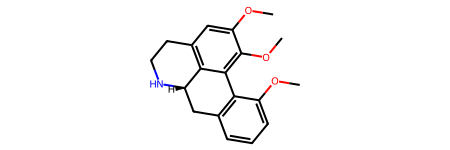

In [28]:
smi = X_smiles[333]
print(f"smi: {smi}")
mol = Chem.MolFromSmiles(smi)
mol

In [29]:
molecular_graph = from_smiles(Y[333], X_smiles[333])
molecular_graph

tensor([1.3920])


Data(x=[23, 9], edge_index=[2, 52], edge_attr=[52, 3], y=[1], smiles='COc1cc2c3c(c1OC)-c1c(cccc1OC)C[C@@H]3NCC2')

smi: COc1cc2c3c(c1OC)-c1c(cccc1OC)C[C@@H]3NCC2


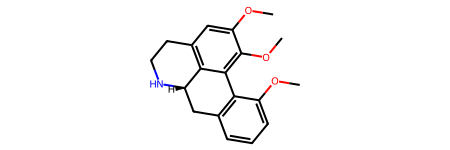

In [30]:
smi = to_smiles(molecular_graph)
print(f"smi: {smi}")
mol = Chem.MolFromSmiles(smi)
mol